سوال 1:

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [223]:
iris = datasets.load_iris()

X = iris.data[:100]
Y = iris.target[:100]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=1)
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=(0.1/0.9), random_state=1) 

In [171]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [224]:
class LogisticRegression:
    def __init__(self,rate=0.1, itration=10000):
        self.rate = rate
        self.itration = itration
    
    def input_preprocess(self, x: np.array, F = 0):
        if F:
            self.mu_x = x.mean(0)
            self.std_x = x.std(0)
        x = (x - self.mu_x) / self.std_x

        if F:
            self.x0 = x.std()
        x = np.append(np.full((len(x), 1), self.x0), x, 1)
        return x

    def fit(self, x: np.array,y: np.array):
        x = self.input_preprocess(x, True)

        tta = np.random.normal(0, y.std() / x.std(), x.shape[1])
        
        self.arrtta = [tta]
        self.arrerror = []
        
        for k in range(self.itration):
            res = self.Dfunc(x, y, tta)
            tta = tta - self.rate * res
            
            self.arrtta.append(tta)
            self.arrerror.append(self.func(x, y, tta))

        self.tta = tta
        return tta
    
    def sigmoid(x):
        return (1 / (1 + np.exp(-x)))
        
    
    def func(self, x: np.array, y: np.array, tta):
        m = x.shape[0]
        S = sigmoid(np.dot(x,tta)) 
        return -(1 / m) * np.sum(y * np.log(S) + (1 - y) * np.log(1 - S))
        
    def Dfunc(self, x: np.array, y: np.array, tta: np.array):
        m = x.shape[0]
        S = sigmoid(np.dot(x,tta))
        return (1 / m) * np.dot(x.T, S - y)

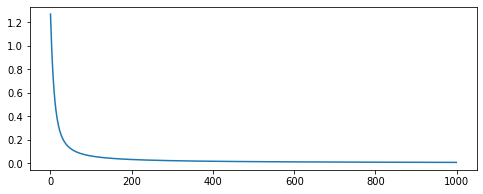

In [225]:
LR = LogisticRegression(0.08, 1000)
LR.fit(X, Y)

plt.figure(figsize=(8, 3))
plt.plot(LR.arrerror)


In [226]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='none', random_state=0)
LR.fit(Xtrain, Ytrain)

AccuracyDataTrain = LR.score(Xtrain, Ytrain)
AccuracyDataTest = LR.score(Xtest, Ytest)

print(f'accuracy of data train is : {AccuracyDataTrain * 100}%')
print(f'accuracy of data test is : {AccuracyDataTest * 100:}%')

accuracy of data train is : 100.0%
accuracy of data test is : 100.0%


سوال 2:

In [198]:
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import datasets
from sklearn import preprocessing

df = pd.read_csv(r"C:\Users\Mohammad\Desktop\sin.csv")

In [199]:
df

,0,1,2
0,0.873008,0.672227,0.0
1,0.534722,0.671441,1.0
2,0.725173,0.577389,0.0
3,0.851713,0.612270,0.0
4,0.205497,0.498256,1.0
...,...,...,...
495,0.966795,1.026929,1.0
496,0.196518,0.278322,1.0
497,0.904149,0.946001,1.0
498,0.864197,0.930917,1.0


In [147]:
X = df.drop(["2"],axis=1).to_numpy("float")
Y = df['2'].to_numpy("float")

X = preprocessing.StandardScaler().fit_transform(X)

In [148]:
from sklearn.svm import SVC

In [149]:
svm_clf = SVC(C=20, kernel='linear')
svm_clf.fit(X,Y)

SVC(C=20, kernel='linear')

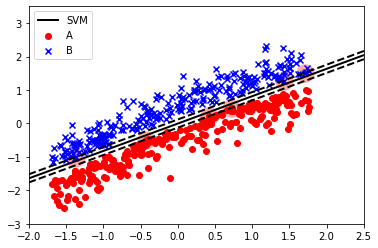

In [150]:
def plot_svc(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=300, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2, label="SVM")
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plot_svc(svm_clf, -5, 5)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1],color='red', marker='o', label='A')
plt.scatter(X[Y != 0, 0], X[Y != 0, 1],color='blue', marker='x', label='B')
plt.axis([-2, 2.5, -3, 3.5])
plt.legend(loc='upper left')
plt.show()    
    

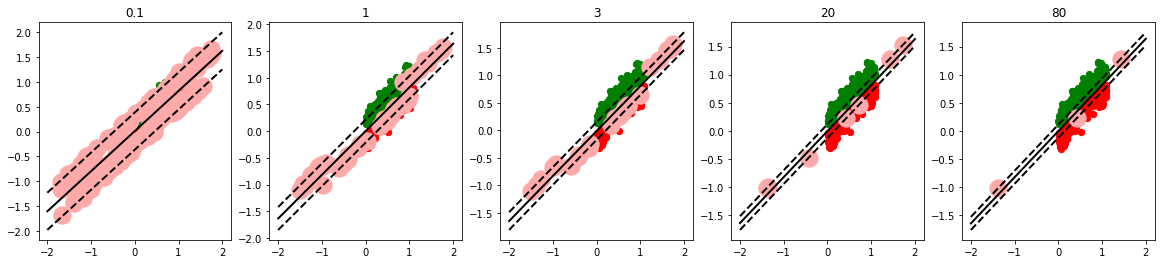

In [157]:
c=[0.1, 1, 3, 20, 80]

plt.figure(figsize=(20, 4))
for i in range(len(c)):
    svc1 = SVC(C=c[i], kernel='linear')
    svc1.fit(X,Y)
    plt.subplot(1, len(c), i + 1)
    plt.title(c[i])
    plt.scatter(df[df['2']==0]['0'], df[df['2']==0]['1'], color="red", s=40)
    plt.scatter(df[df['2']==1]['0'], df[df['2']==1]['1'], color="green", s=40)

    plot_svc(svc1,-2,2)

plt.show()

با افزایش c متوجه می شویم که margin کوچک می شود .

سوال 3:

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
def func1(A):
    return max(set(A), key=A.count)

def Distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=1))

class KNNClassifier:
    
    def __init__(self, K=4, blank=Distance):
        self.K = K
        self.blank = blank
        
    def fit(self, Xtrain, ytrain):
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        
    def predict(self, Xtest):
        near = []
        for x in Xtest:
            dist = self.blank(x, self.Xtrain)
            y2 = [y for _, y in sorted(zip(dist, self.ytrain))]
            near.append(y2[:self.K])
        return list(map(func1, near))
    
    def findaccuracy(self, Xtest, ytest):
        yprediction = self.predict(Xtest)
        Acc = sum(yprediction == ytest) / len(ytest)
        return Acc

In [76]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [77]:
standard = StandardScaler().fit(Xtrain)
Xtrain, Xtest = standard.transform(Xtrain), standard.transform(Xtest)

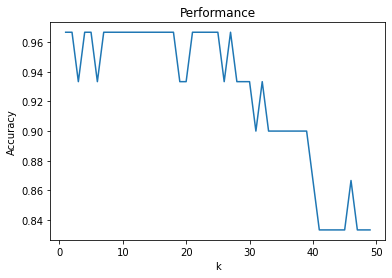

In [79]:
accs = []
R = range(1, 50)
for k in R:
    knn = KNNClassifier(K=k)
    knn.fit(Xtrain, ytrain)
    acc = knn.findaccuracy(Xtest, ytest)
    accs.append(acc)
    

fig, ax = plt.subplots()
ax.plot(R, accs)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance")
plt.show()

مطابق با نمودار به دست آمده مشاهده میکنیم که هر چه مقدار k بیشتر می شود accuracy مدل کمتر می شود در واقع مدل underfit می شود و کمترین مقدار accuracy در k به ازای 40 تا 50 رخ می دهد که در این بازه accuracy کم تر از 0.84 شده است.

سوال 4:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [11]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

In [17]:
Xtrain.shape

(105, 4)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion': ['gini','entropy'],
    'max_depth': [1, 2, 3 , 4 , 5 , 6 ,7],
    'min_samples_split': [1, 2, 3 , 4 , 5 , 6 , 7],
    'min_samples_leaf':[1, 2, 3 , 4 , 5 , 6 , 7]
}
grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(Xtrain, ytrain)

c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\python37\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "c:\python\python37\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7]})

In [28]:
grid.best_score_, grid.best_params_

(0.9619047619047618,
 {'criterion': 'entropy',
  'max_depth': 4,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [31]:
DecisionTree = DecisionTreeClassifier(criterion = "gini", max_depth=4, min_samples_leaf=1, min_samples_split=2)
DecisionTree.fit(Xtrain, ytrain)
accuracy = DecisionTree.score(Xtest,ytest)
print("Train data accuracy:: ", accuracy)

Train data accuracy::  0.9333333333333333


In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
y_predict = DecisionTree.predict(Xtest)
confusion_matrix(ytest, y_predict)

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 14]], dtype=int64)

همانطور که مشاهده می شود ماتریس confusion را به دست آوردیم که دارای سه کلاس می باشد برای کلاس اول همه 17 داده  درست پیش بینی شده اند. برای کلاس دوم 11 داده به درستی پیش بینی شده و فقظ 1 داده به اشتباه پیش بینی شده است و برای کلاس سوم هم 14 داده درست و 2 داده غلط پیش بینی شده است. 